In [21]:
# Step 1
## Import requirement modules
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

In [22]:
# Step 2
## Set params

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 20})

In [23]:
# Step 3
## Get Faces data from source

listOfFaces = scipy.io.loadmat(os.path.join('./faces.mat'))
faces = listOfFaces['faces']
row = int(listOfFaces['m'])
columns = int(listOfFaces['n'])
nfaces = np.ndarray.flatten(listOfFaces['nfaces'])
print(nfaces)

[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


In [24]:
# Step 4
## Traing 18 people of data

trainedFaces = faces[:,:np.sum(nfaces[:18])]
meanOfFace = np.mean(trainedFaces,axis=1)

In [25]:
# Step 5
## In this step we are computing eigenfaces. To calculate we must substract mean from training data
X = trainedFaces - np.tile(meanOfFace,(trainedFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

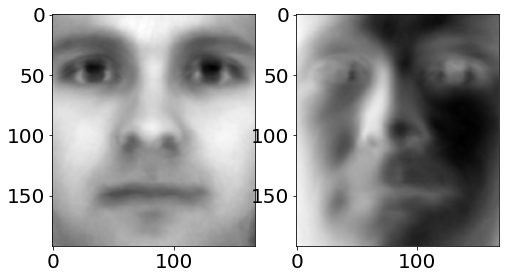

In [26]:
# Step 6
## showed the result
figure1 = plt.figure()
ax1 = figure1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(meanOfFace,(row, columns)).T, cmap='gray')

ax2 = figure1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(row, columns)).T, cmap='gray')

plt.show()

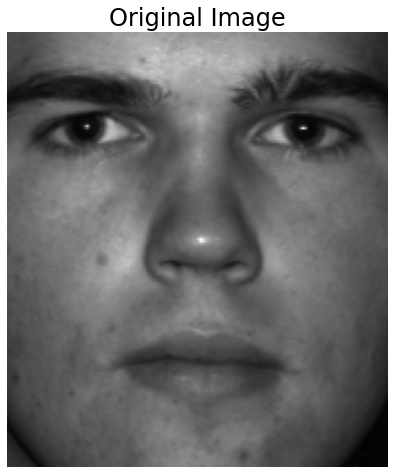

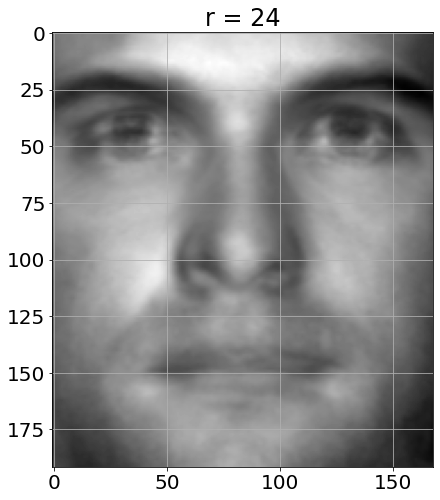

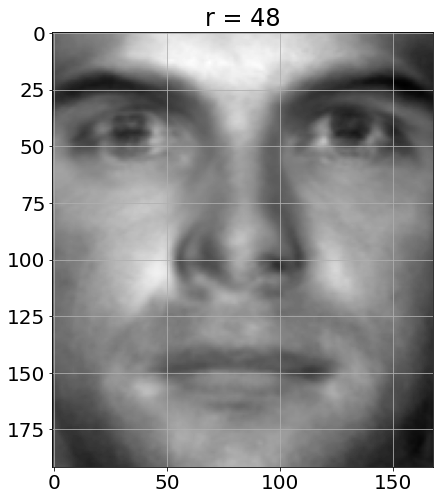

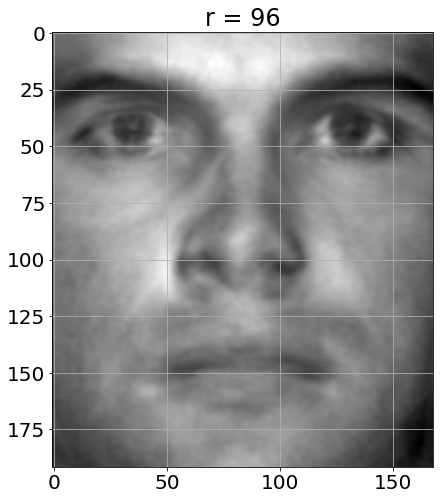

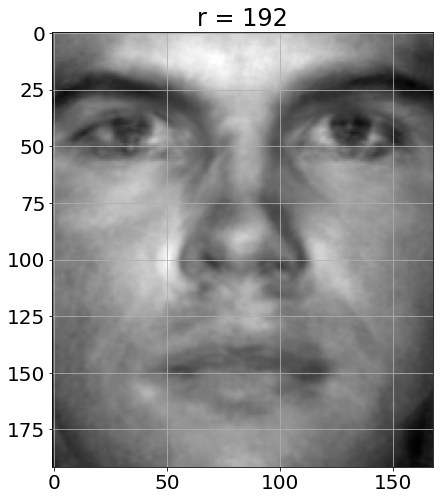

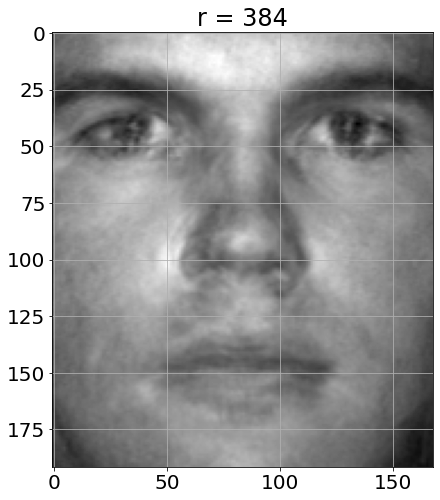

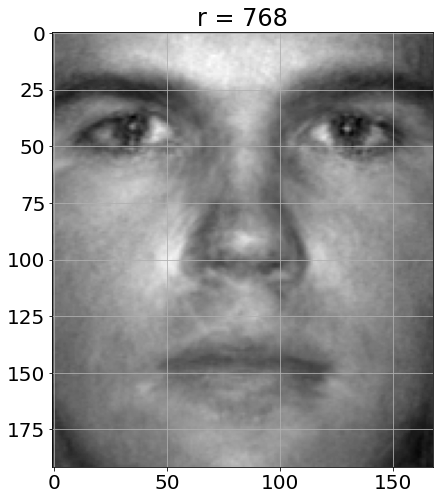

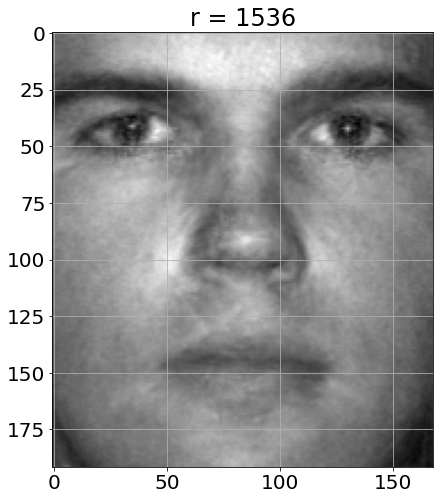

In [34]:
# Step 7
## Show eigenface reconstruction 
testFace = faces[:,np.sum(nfaces[:18])] 
plt.imshow(np.reshape(testFace,(row,columns)).T, cmap='gray')
plt.title('Original Image')

plt.grid()

plt.show()

testFaceMS = testFace - meanOfFace
listOfR = [24, 48, 96, 192, 384, 768, 1536]

for r in listOfR:
    reconFace = meanOfFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(row,columns)).T, cmap='gray')
    plt.title('r = ' + str(r))
    
    plt.grid()
    
    plt.show()

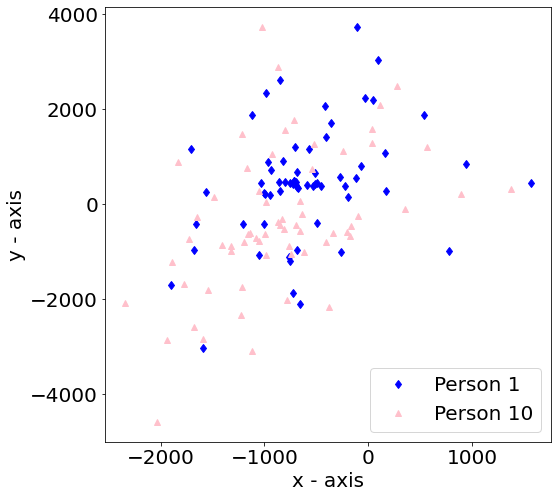

In [38]:
P1num = 1
P2num = 10 

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(meanOfFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(meanOfFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d', color='blue', label='Person 1')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^', color='pink',label='Person 10')
plt.legend()
plt.show()